In [4]:
import os
import tabula
import pandas as pd
import matplotlib.pyplot as plt
import tabula

In [5]:
# current_dir = "./budget-tool"
pdf_name = "6-Month statement.pdf"
# pdf_file = os.path.join(current_dir, pdf_name)

page_dfs = tabula.read_pdf(pdf_name, pages="all")

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


In [6]:
page_dfs[1]

,Date,Description,Payments,Deposits,Balance
0,10 Sep 24,FLW*UBER TRIP 5264*4954 07 SEP,-47.00,NaN,"282,403.60"
1,NaN,CHEQUE CARD PURCHASE,NaN,NaN,NaN
2,11 Sep 24,TOPS VREDEHOE 5264*4954 07 SEP,-215.98,NaN,"282,187.62"
3,NaN,CHEQUE CARD PURCHASE,NaN,NaN,NaN
4,11 Sep 24,KWIKSPAR VRED 5264*4954 08 SEP,-45.98,NaN,"282,141.64"
5,NaN,CHEQUE CARD PURCHASE,NaN,NaN,NaN
6,11 Sep 24,DEER PARK CAF 5264*4954 09 SEP,-80.00,NaN,"282,061.64"
7,NaN,CHEQUE CARD PURCHASE,NaN,NaN,NaN
8,12 Sep 24,YOCO *VYAS 5264*4954 10 SEP,-39.00,NaN,"282,022.64"
9,NaN,CHEQUE CARD PURCHASE,NaN,NaN,NaN


In [7]:
def categorise(description: str):
    description = description.lower()
    if any(grocer in description for grocer in ["spar", "woolworths", "checkers", "pnp"]):
        return "groceries"
    elif "uber" in description:
        return "uber"
    elif "prepaid" in description:
        return "airtime"
    elif "rent" in description:
        return "rent"
    elif any(person in description for person in ["tom", "isabel", "laura", "josh", "tali"]):
        return "friends"
    elif "virgin" in description:
        return "gym"
    elif "takealo" in description:
        return "takealot"
    else:
        return "other"
    
df = pd.DataFrame(columns=["Date", "Payments", "Deposits", "Category"])
for page_df in page_dfs:
    page_df = page_df.dropna(subset=["Date"])
    page_df["Date"] = pd.to_datetime(page_df["Date"])

    page_df["Category"] = page_df["Description"].apply(categorise)

    page_df["Payments"] = pd.to_numeric(page_df["Payments"], errors="coerce").fillna(0)

    page_df["Deposits"] = pd.to_numeric(page_df["Deposits"], errors="coerce").fillna(0)

    df = pd.concat((page_df, df))

df.reset_index(inplace=True)

/var/folders/qc/h4k546bs6j9bl76bcjwyw5cw0000gn/T/ipykernel_75422/2643889972.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  page_df["Date"] = pd.to_datetime(page_df["Date"])
/var/folders/qc/h4k546bs6j9bl76bcjwyw5cw0000gn/T/ipykernel_75422/2643889972.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_df["Date"] = pd.to_datetime(page_df["Date"])
/var/folders/qc/h4k546bs6j9bl76bcjwyw5cw0000gn/T/ipykernel_75422/2643889972.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
df

In [8]:
df[df["Category"] == "other"]

,index,Date,Description,Payments,Deposits,Balance,Category
0,0,2025-03-04,M*HTTPS://WWW 5264*4954 28 FEB,-37.0,0.0,"321,540.84",other
1,2,2025-03-04,INCREDIBLE CO 5264*4954 01 MAR,-399.0,0.0,"321,141.84",other
2,4,2025-03-04,YOCO *NICHE 5264*4954 01 MAR,-677.0,0.0,"320,464.84",other
5,10,2025-03-04,YOCO *TEXAS 5264*4954 01 MAR,-22.0,0.0,"320,032.58",other
6,12,2025-03-04,YOCO *STORA 5264*4954 02 MAR,-76.8,0.0,"319,955.78",other
...,...,...,...,...,...,...,...
568,17,2024-09-10,MCD GREEN POI 5264*4954 07 SEP,-160.8,0.0,"283,082.65",other
569,19,2024-09-10,YOCO *PARTY 5264*4954 07 SEP,-185.0,0.0,"282,897.65",other
571,23,2024-09-10,YOCO *THE E 5264*4954 06 SEP,-55.0,0.0,"282,640.60",other
572,25,2024-09-10,YOCO *PARTY 5264*4954 07 SEP,-100.0,0.0,"282,540.60",other


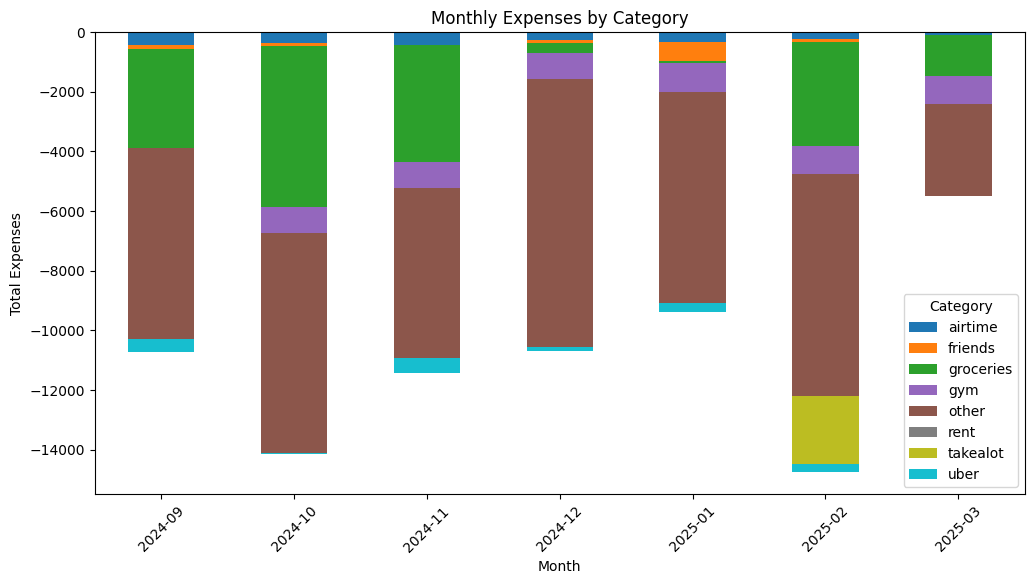

In [9]:
df["YearMonth"] = df["Date"].dt.to_period("M")

# Aggregate expenses by month and category
df_grouped = df.groupby(["YearMonth", "Category"])["Payments"].sum().unstack()

# Plot stacked bar chart
df_grouped.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Total Expenses")
plt.title("Monthly Expenses by Category")
plt.legend(title="Category")
plt.xticks(rotation=45)

# Show plot
plt.show()


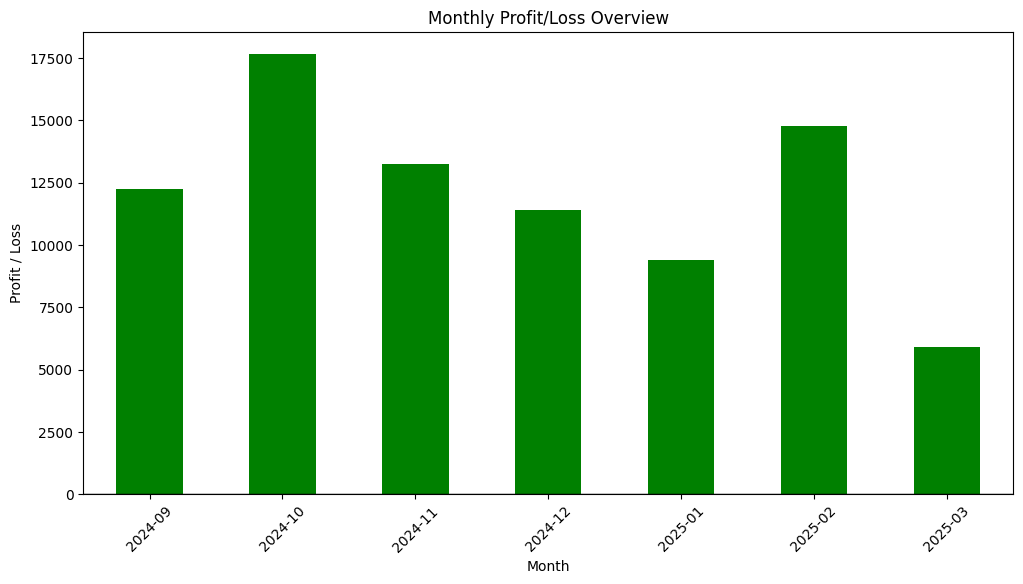

In [10]:
monthly_summary = df.groupby("YearMonth")[["Payments", "Deposits"]].sum()

# Compute Profit/Loss
monthly_summary["Profit/Loss"] = (
    monthly_summary["Deposits"] - monthly_summary["Payments"]
)

# Plot Profit/Loss as a bar chart
monthly_summary["Profit/Loss"].plot(
    kind="bar",
    figsize=(12, 6),
    color=["green" if x >= 0 else "red" for x in monthly_summary["Profit/Loss"]],
)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Profit / Loss")
plt.title("Monthly Profit/Loss Overview")
plt.axhline(0, color="black", linewidth=1)  # Reference line for zero profit/loss
plt.xticks(rotation=45)

plt.show()
